In [17]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import json

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime

import matplotlib.dates as mdates

#from secret import *

### LOAD DATA FROM SYSTEM OR WEB

In [2]:
if os.path.isfile("afl.com.au_full_data_set_new.csv"):
    filepath_afl = "afl.com.au_full_data_set_new.csv"
    print ("afl.com.au loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



afl.com.au loading from file


In [3]:
if os.path.isfile("afl_wiki_data_set.csv"):
    filepath_wiki = "afl_wiki_data_set.csv"
    print ("afl_wiki loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl_wiki loading from the internet")




afl_wiki loading from file


### READ CSV FILE

In [4]:
df_afl= pd.read_csv(filepath_afl)
print ("done")

done


In [5]:
df_wiki= pd.read_csv(filepath_wiki)
print ("done")

done


In [6]:
def get_teamname_home(row):
    di_teamnames= {'Essendon': 'Essendon',
                   'Brisbane Lions': 'Brisbane Lions',
                   'Carlton': 'Carlton',
                   'Hawthorn': 'Hawthorn',
                   'Richmond': 'Richmond',
                   'Port Adelaide': 'Port Adelaide',
                   'Kangaroos': 'North Melbourne',
                   'North Melbourne': 'North Melbourne',
                   'Fremantle': 'Fremantle',
                   'Western Bulldogs': 'Western Bulldogs',
                   'Geelong': 'Geelong Cats',
                   'Melbourne': 'Melbourne',
                   'Sydney': 'Sydney Swans',
                   'Collingwood': 'Collingwood',
                   'Adelaide': 'Adelaide Crows',
                   'St Kilda':  'St Kilda',
                   'West Coast': 'West Coast Eagles',
                   'Gold Coast':'Gold Coast Suns',
                   'Greater Western Sydney': 'GWS Giants'}
                
    return di_teamnames[row.Home_Team]

In [7]:
def get_teamname_away(row):
    di_teamnames= {'Essendon': 'Essendon',
                   'Brisbane Lions': 'Brisbane Lions',
                   'Brisbane': 'Brisbane Lions',
                   'Carlton': 'Carlton',
                   'Hawthorn': 'Hawthorn',
                   'Richmond': 'Richmond',
                   'Port Adelaide': 'Port Adelaide',
                   'Kangaroos': 'North Melbourne',
                   'North Melbourne': 'North Melbourne',
                   'Fremantle': 'Fremantle',
                   'Western Bulldogs': 'Western Bulldogs',
                   'Geelong': 'Geelong Cats',
                   'Melbourne': 'Melbourne',
                   'Sydney': 'Sydney Swans',
                   'Collingwood': 'Collingwood',
                   'Adelaide': 'Adelaide Crows',
                   'St Kilda':  'St Kilda',
                   'West Coast': 'West Coast Eagles',
                   'Gold Coast':'Gold Coast Suns',
                   'Greater Western Sydney': 'GWS Giants'}
                
    return di_teamnames[row.Away_Team]

In [8]:
df_wiki["Home_Filter"] = df_wiki.apply(get_teamname_home, axis=1)

In [9]:
df_wiki["Away_Filter"] = df_wiki.apply(get_teamname_away, axis=1)

In [10]:
def wiki_total_score(x):
    score = x.Away_Total + x.Home_Total
    return (score)

In [11]:
df_wiki['Match_Total_Score']= df_wiki.apply(wiki_total_score, axis =1)

In [12]:
df_wiki.dtypes

Unnamed: 0            int64
Away_Behinds         object
Away_Goals            int64
Away_Team            object
Away_Total            int64
Crowd                 int64
Date                  int64
Day                  object
Home_Behinds         object
Home_Goals            int64
Home_Team            object
Home_Total            int64
Match_Link           object
Month                object
Round                object
Structured_Data      object
Time                 object
Venue                object
Year                  int64
City                 object
station_ID           object
URL                  object
Rain                 object
Home_Filter          object
Away_Filter          object
Match_Total_Score     int64
dtype: object

In [183]:
def wiki_data_row (row, colname):

    ## Elements to Match
    AFL_Year = row.YEAR
    AFL_Total = row.TOTAL_SCORE 
    
    if row.HOME == True: 
        AFL_Home_Team = row.TEAMNAME
        AFL_Away_Team = row.OPPONENT
    
    elif row.HOME == False:
        AFL_Home_Team = row.OPPONENT
        AFL_Away_Team = row.TEAMNAME
    
    else:
        print (row, "error has occured")
                     

    wiki_row = df_wiki.loc[(df_wiki.Away_Filter  == AFL_Away_Team) & (df_wiki.Home_Filter == AFL_Home_Team) & (df_wiki.Year == AFL_Year) & (df_wiki.Match_Total_Score == AFL_Total)]
    #print (AFL_Home_Team,AFL_Away_Team, AFL_Year, AFL_Total)
    element = list(wiki_row[colname])[0]
    print (wiki_row.index)
    print (element)
    return (element)
    #return (matching_row)
    #return ("print here")

def get_crowd(row):
    return int(wiki_data_row (row, "Crowd"))

def get_rain(row):
    result = wiki_data_row (row, "Rain")
    try: 
        return float(result)
    except: 
        return ("No Data")

def get_city(row):
    return wiki_data_row (row, "City")

def get_venue(row):
    return wiki_data_row (row, "Venue")

def get_plot_times (row):
    # https://docs.python.org/2/library/time.html
    time_result= wiki_data_row (row, "Structured_Data")
    time_dates = mdates.date2num(datetime.strptime(time_result, "%d/%m/%Y %H:%M"))
    print (time_dates)
    return (time_dates)
   
    
def get_structured_data(row):
    time_result= wiki_data_row (row, "Structured_Data")
    struct_time = time.strptime(time_result, "%d/%m/%Y %H:%M")
    dt = datetime.fromtimestamp(time.mktime(struct_time))
    #return (struct_time)
    return (dt)


def get_match_link(row):
    return str(wiki_data_row (row, "Match_Link"))

def get_bom_url(row):
    return wiki_data_row (row, "URL")

def get_date(row):
    return wiki_data_row (row, "Date")

def get_round(row):
    return wiki_data_row (row, "Round")

def get_day(row):
    return wiki_data_row (row, "Day")

def get_month(row):
    return wiki_data_row (row, "Month")

def get_team_score(row):
    if row.HOME == True:
        return wiki_data_row (row, "Home_Total")
    else:
         return wiki_data_row (row, "Away_Total")
        
def get_opponent_score(row):
    if row.HOME == True:
        return wiki_data_row (row, "Away_Total")
    else:
         return wiki_data_row (row, "Home_Total")

In [45]:
df_afl["CROWD"] = df_afl.apply(get_crowd, axis=1)

Int64Index([3081], dtype='int64')
73137
Int64Index([3081], dtype='int64')
73137
Int64Index([3082], dtype='int64')
66254
Int64Index([3082], dtype='int64')
66254
Int64Index([3084], dtype='int64')
36249
Int64Index([3084], dtype='int64')
36249
Int64Index([3083], dtype='int64')
33129
Int64Index([3083], dtype='int64')
33129
Int64Index([3086], dtype='int64')
12710
Int64Index([3086], dtype='int64')
12710
Int64Index([3085], dtype='int64')
78294
Int64Index([3085], dtype='int64')
78294
Int64Index([3087], dtype='int64')
21997
Int64Index([3087], dtype='int64')
21997
Int64Index([3088], dtype='int64')
43993
Int64Index([3088], dtype='int64')
43993
Int64Index([3089], dtype='int64')
34638
Int64Index([3089], dtype='int64')
34638
Int64Index([3090], dtype='int64')
58236
Int64Index([3090], dtype='int64')
58236
Int64Index([3091], dtype='int64')
42834
Int64Index([3091], dtype='int64')
42834
Int64Index([3092], dtype='int64')
37420
Int64Index([3092], dtype='int64')
37420
Int64Index([3093], dtype='int64')
8022
I

In [144]:
df_afl.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
BEHINDS                          int64
BOUNCES                          int64
CENTRECLEARANCES                 int64
CLANGERS                         int64
CONTESTEDMARKS                   int64
CONTESTEDPOSSESSIONS             int64
DISPOSALEFFICIENCY             float64
DISPOSALS                        int64
DREAMTEAMPOINTS                  int64
FREESAGAINST                     int64
FREESFOR                         int64
GOALACCURACY                   float64
GOALASSISTS                      int64
GOALEFFICIENCY                 float64
GOALS                            int64
HANDBALLS                        int64
HITOUTS                          int64
HOME                              bool
INSIDE50S                        int64
INTERCEPTS                     float64
INTERCHANGECOUNTS               object
KICKS                            int64
LASTUPDATED                     object
MARKS                    

In [184]:
df_afl["TEAM_SCORE"] = df_afl.apply(get_team_score, axis=1)

Int64Index([3081], dtype='int64')
89
Int64Index([3081], dtype='int64')
132
Int64Index([3082], dtype='int64')
86
Int64Index([3082], dtype='int64')
100
Int64Index([3084], dtype='int64')
90
Int64Index([3084], dtype='int64')
120
Int64Index([3083], dtype='int64')
82
Int64Index([3083], dtype='int64')
110
Int64Index([3086], dtype='int64')
96
Int64Index([3086], dtype='int64')
98
Int64Index([3085], dtype='int64')
116
Int64Index([3085], dtype='int64')
91
Int64Index([3087], dtype='int64')
93
Int64Index([3087], dtype='int64')
136
Int64Index([3088], dtype='int64')
147
Int64Index([3088], dtype='int64')
91
Int64Index([3089], dtype='int64')
73
Int64Index([3089], dtype='int64')
115
Int64Index([3090], dtype='int64')
99
Int64Index([3090], dtype='int64')
80
Int64Index([3091], dtype='int64')
110
Int64Index([3091], dtype='int64')
87
Int64Index([3092], dtype='int64')
89
Int64Index([3092], dtype='int64')
113
Int64Index([3093], dtype='int64')
160
Int64Index([3093], dtype='int64')
58
Int64Index([3094], dtype='i

In [185]:
df_afl["OPPONENT_SCORE"] = df_afl.apply(get_opponent_score, axis=1)

Int64Index([3081], dtype='int64')
132
Int64Index([3081], dtype='int64')
89
Int64Index([3082], dtype='int64')
100
Int64Index([3082], dtype='int64')
86
Int64Index([3084], dtype='int64')
120
Int64Index([3084], dtype='int64')
90
Int64Index([3083], dtype='int64')
110
Int64Index([3083], dtype='int64')
82
Int64Index([3086], dtype='int64')
98
Int64Index([3086], dtype='int64')
96
Int64Index([3085], dtype='int64')
91
Int64Index([3085], dtype='int64')
116
Int64Index([3087], dtype='int64')
136
Int64Index([3087], dtype='int64')
93
Int64Index([3088], dtype='int64')
91
Int64Index([3088], dtype='int64')
147
Int64Index([3089], dtype='int64')
115
Int64Index([3089], dtype='int64')
73
Int64Index([3090], dtype='int64')
80
Int64Index([3090], dtype='int64')
99
Int64Index([3091], dtype='int64')
87
Int64Index([3091], dtype='int64')
110
Int64Index([3092], dtype='int64')
113
Int64Index([3092], dtype='int64')
89
Int64Index([3093], dtype='int64')
58
Int64Index([3093], dtype='int64')
160
Int64Index([3094], dtype='i

In [46]:
df_afl["RAIN"] = df_afl.apply(get_rain, axis=1)

Int64Index([3081], dtype='int64')
0
Int64Index([3081], dtype='int64')
0
Int64Index([3082], dtype='int64')
0
Int64Index([3082], dtype='int64')
0
Int64Index([3084], dtype='int64')
0
Int64Index([3084], dtype='int64')
0
Int64Index([3083], dtype='int64')
4.8
Int64Index([3083], dtype='int64')
4.8
Int64Index([3086], dtype='int64')
13.6
Int64Index([3086], dtype='int64')
13.6
Int64Index([3085], dtype='int64')
0
Int64Index([3085], dtype='int64')
0
Int64Index([3087], dtype='int64')
0
Int64Index([3087], dtype='int64')
0
Int64Index([3088], dtype='int64')
0
Int64Index([3088], dtype='int64')
0
Int64Index([3089], dtype='int64')
2.2
Int64Index([3089], dtype='int64')
2.2
Int64Index([3090], dtype='int64')
2.8
Int64Index([3090], dtype='int64')
2.8
Int64Index([3091], dtype='int64')
2.8
Int64Index([3091], dtype='int64')
2.8
Int64Index([3092], dtype='int64')
nan
Int64Index([3092], dtype='int64')
nan
Int64Index([3093], dtype='int64')
0
Int64Index([3093], dtype='int64')
0
Int64Index([3094], dtype='int64')
0.2


In [47]:
df_afl["CITY"] = df_afl.apply(get_city, axis=1)

Int64Index([3081], dtype='int64')
Melbourne
Int64Index([3081], dtype='int64')
Melbourne
Int64Index([3082], dtype='int64')
Melbourne
Int64Index([3082], dtype='int64')
Melbourne
Int64Index([3084], dtype='int64')
Melbourne
Int64Index([3084], dtype='int64')
Melbourne
Int64Index([3083], dtype='int64')
Sydney
Int64Index([3083], dtype='int64')
Sydney
Int64Index([3086], dtype='int64')
Gold Coast
Int64Index([3086], dtype='int64')
Gold Coast
Int64Index([3085], dtype='int64')
Melbourne
Int64Index([3085], dtype='int64')
Melbourne
Int64Index([3087], dtype='int64')
Melbourne
Int64Index([3087], dtype='int64')
Melbourne
Int64Index([3088], dtype='int64')
Adelaide
Int64Index([3088], dtype='int64')
Adelaide
Int64Index([3089], dtype='int64')
Perth
Int64Index([3089], dtype='int64')
Perth
Int64Index([3090], dtype='int64')
Melbourne
Int64Index([3090], dtype='int64')
Melbourne
Int64Index([3091], dtype='int64')
Melbourne
Int64Index([3091], dtype='int64')
Melbourne
Int64Index([3092], dtype='int64')
Melbourne
In

In [48]:
df_afl["VENUE"] = df_afl.apply(get_venue, axis=1)

Int64Index([3081], dtype='int64')
MCG
Int64Index([3081], dtype='int64')
MCG
Int64Index([3082], dtype='int64')
MCG
Int64Index([3082], dtype='int64')
MCG
Int64Index([3084], dtype='int64')
Etihad Stadium
Int64Index([3084], dtype='int64')
Etihad Stadium
Int64Index([3083], dtype='int64')
SCG
Int64Index([3083], dtype='int64')
SCG
Int64Index([3086], dtype='int64')
Metricon Stadium
Int64Index([3086], dtype='int64')
Metricon Stadium
Int64Index([3085], dtype='int64')
MCG
Int64Index([3085], dtype='int64')
MCG
Int64Index([3087], dtype='int64')
Etihad Stadium
Int64Index([3087], dtype='int64')
Etihad Stadium
Int64Index([3088], dtype='int64')
Adelaide Oval
Int64Index([3088], dtype='int64')
Adelaide Oval
Int64Index([3089], dtype='int64')
Domain Stadium
Int64Index([3089], dtype='int64')
Domain Stadium
Int64Index([3090], dtype='int64')
MCG
Int64Index([3090], dtype='int64')
MCG
Int64Index([3091], dtype='int64')
Etihad Stadium
Int64Index([3091], dtype='int64')
Etihad Stadium
Int64Index([3092], dtype='int6

In [32]:
df_afl["STRUCT_TIME"] = df_afl.apply(get_structured_data, axis=1)

Int64Index([3081], dtype='int64')
23/03/2017 19:20
Int64Index([3081], dtype='int64')
23/03/2017 19:20
Int64Index([3082], dtype='int64')
24/03/2017 19:50
Int64Index([3082], dtype='int64')
24/03/2017 19:50
Int64Index([3084], dtype='int64')
25/03/2017 16:35
Int64Index([3084], dtype='int64')
25/03/2017 16:35
Int64Index([3083], dtype='int64')
25/03/2017 16:35
Int64Index([3083], dtype='int64')
25/03/2017 16:35
Int64Index([3086], dtype='int64')
25/03/2017 19:05
Int64Index([3086], dtype='int64')
25/03/2017 19:05
Int64Index([3085], dtype='int64')
25/03/2017 19:25
Int64Index([3085], dtype='int64')
25/03/2017 19:25
Int64Index([3087], dtype='int64')
26/03/2017 13:10
Int64Index([3087], dtype='int64')
26/03/2017 13:10
Int64Index([3088], dtype='int64')
26/03/2017 14:45
Int64Index([3088], dtype='int64')
26/03/2017 14:45
Int64Index([3089], dtype='int64')
26/03/2017 16:40
Int64Index([3089], dtype='int64')
26/03/2017 16:40
Int64Index([3090], dtype='int64')
30/03/2017 19:20
Int64Index([3090], dtype='int64

In [31]:
df_afl["PLOT_TIME"] = df_afl.apply(get_plot_times, axis=1)

Int64Index([3081], dtype='int64')
23/03/2017 19:20
736411.8055555555
Int64Index([3081], dtype='int64')
23/03/2017 19:20
736411.8055555555
Int64Index([3082], dtype='int64')
24/03/2017 19:50
736412.8263888889
Int64Index([3082], dtype='int64')
24/03/2017 19:50
736412.8263888889
Int64Index([3084], dtype='int64')
25/03/2017 16:35
736413.6909722222
Int64Index([3084], dtype='int64')
25/03/2017 16:35
736413.6909722222
Int64Index([3083], dtype='int64')
25/03/2017 16:35
736413.6909722222
Int64Index([3083], dtype='int64')
25/03/2017 16:35
736413.6909722222
Int64Index([3086], dtype='int64')
25/03/2017 19:05
736413.7951388889
Int64Index([3086], dtype='int64')
25/03/2017 19:05
736413.7951388889
Int64Index([3085], dtype='int64')
25/03/2017 19:25
736413.8090277778
Int64Index([3085], dtype='int64')
25/03/2017 19:25
736413.8090277778
Int64Index([3087], dtype='int64')
26/03/2017 13:10
736414.5486111111
Int64Index([3087], dtype='int64')
26/03/2017 13:10
736414.5486111111
Int64Index([3088], dtype='int64')


In [55]:
df_afl["MATCH_LINK"] = df_afl.apply(get_match_link, axis=1)

Int64Index([3081], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/carl-v-rich
Int64Index([3081], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/carl-v-rich
Int64Index([3082], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/coll-v-wb
Int64Index([3082], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/coll-v-wb
Int64Index([3084], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/stk-v-melb
Int64Index([3084], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/stk-v-melb
Int64Index([3083], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/syd-v-port
Int64Index([3083], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/syd-v-port
Int64Index([3086], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/gcfc-v-bl
Int64Index([3086], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/gcfc-v-bl
Int64Index([3085], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/ess-v-haw
Int64Index([3085], dtype='int64')
http://www.a

In [ ]:
#df_afl["BOM_URL"] = df_afl.apply(get_bom_url, axis=1)

In [49]:
df_afl["DATE"] = df_afl.apply(get_date, axis=1)

Int64Index([3081], dtype='int64')
23
Int64Index([3081], dtype='int64')
23
Int64Index([3082], dtype='int64')
24
Int64Index([3082], dtype='int64')
24
Int64Index([3084], dtype='int64')
25
Int64Index([3084], dtype='int64')
25
Int64Index([3083], dtype='int64')
25
Int64Index([3083], dtype='int64')
25
Int64Index([3086], dtype='int64')
25
Int64Index([3086], dtype='int64')
25
Int64Index([3085], dtype='int64')
25
Int64Index([3085], dtype='int64')
25
Int64Index([3087], dtype='int64')
26
Int64Index([3087], dtype='int64')
26
Int64Index([3088], dtype='int64')
26
Int64Index([3088], dtype='int64')
26
Int64Index([3089], dtype='int64')
26
Int64Index([3089], dtype='int64')
26
Int64Index([3090], dtype='int64')
30
Int64Index([3090], dtype='int64')
30
Int64Index([3091], dtype='int64')
31
Int64Index([3091], dtype='int64')
31
Int64Index([3092], dtype='int64')
1
Int64Index([3092], dtype='int64')
1
Int64Index([3093], dtype='int64')
1
Int64Index([3093], dtype='int64')
1
Int64Index([3094], dtype='int64')
1
Int64I

In [50]:
df_afl["ROUND_WIKI"] = df_afl.apply(get_round, axis=1)

Int64Index([3081], dtype='int64')
Round 1 (Opening Round)
Int64Index([3081], dtype='int64')
Round 1 (Opening Round)
Int64Index([3082], dtype='int64')
Round 1 (Opening Round)
Int64Index([3082], dtype='int64')
Round 1 (Opening Round)
Int64Index([3084], dtype='int64')
Round 1 (Opening Round)
Int64Index([3084], dtype='int64')
Round 1 (Opening Round)
Int64Index([3083], dtype='int64')
Round 1 (Opening Round)
Int64Index([3083], dtype='int64')
Round 1 (Opening Round)
Int64Index([3086], dtype='int64')
Round 1 (Opening Round)
Int64Index([3086], dtype='int64')
Round 1 (Opening Round)
Int64Index([3085], dtype='int64')
Round 1 (Opening Round)
Int64Index([3085], dtype='int64')
Round 1 (Opening Round)
Int64Index([3087], dtype='int64')
Round 1 (Opening Round)
Int64Index([3087], dtype='int64')
Round 1 (Opening Round)
Int64Index([3088], dtype='int64')
Round 1 (Opening Round)
Int64Index([3088], dtype='int64')
Round 1 (Opening Round)
Int64Index([3089], dtype='int64')
Round 1 (Opening Round)
Int64Index([30

In [51]:
df_afl["DAY"] = df_afl.apply(get_day, axis=1)

Int64Index([3081], dtype='int64')
Thursday
Int64Index([3081], dtype='int64')
Thursday
Int64Index([3082], dtype='int64')
Friday
Int64Index([3082], dtype='int64')
Friday
Int64Index([3084], dtype='int64')
Saturday
Int64Index([3084], dtype='int64')
Saturday
Int64Index([3083], dtype='int64')
Saturday
Int64Index([3083], dtype='int64')
Saturday
Int64Index([3086], dtype='int64')
Saturday
Int64Index([3086], dtype='int64')
Saturday
Int64Index([3085], dtype='int64')
Saturday
Int64Index([3085], dtype='int64')
Saturday
Int64Index([3087], dtype='int64')
Sunday
Int64Index([3087], dtype='int64')
Sunday
Int64Index([3088], dtype='int64')
Sunday
Int64Index([3088], dtype='int64')
Sunday
Int64Index([3089], dtype='int64')
Sunday
Int64Index([3089], dtype='int64')
Sunday
Int64Index([3090], dtype='int64')
Thursday
Int64Index([3090], dtype='int64')
Thursday
Int64Index([3091], dtype='int64')
Friday
Int64Index([3091], dtype='int64')
Friday
Int64Index([3092], dtype='int64')
Saturday
Int64Index([3092], dtype='int64

In [52]:
df_afl["MONTH"] = df_afl.apply(get_month, axis=1)

Int64Index([3081], dtype='int64')
March
Int64Index([3081], dtype='int64')
March
Int64Index([3082], dtype='int64')
March
Int64Index([3082], dtype='int64')
March
Int64Index([3084], dtype='int64')
March
Int64Index([3084], dtype='int64')
March
Int64Index([3083], dtype='int64')
March
Int64Index([3083], dtype='int64')
March
Int64Index([3086], dtype='int64')
March
Int64Index([3086], dtype='int64')
March
Int64Index([3085], dtype='int64')
March
Int64Index([3085], dtype='int64')
March
Int64Index([3087], dtype='int64')
March
Int64Index([3087], dtype='int64')
March
Int64Index([3088], dtype='int64')
March
Int64Index([3088], dtype='int64')
March
Int64Index([3089], dtype='int64')
March
Int64Index([3089], dtype='int64')
March
Int64Index([3090], dtype='int64')
March
Int64Index([3090], dtype='int64')
March
Int64Index([3091], dtype='int64')
March
Int64Index([3091], dtype='int64')
March
Int64Index([3092], dtype='int64')
April
Int64Index([3092], dtype='int64')
April
Int64Index([3093], dtype='int64')
April


In [21]:
df_afl['PLOT_TIME']

0      2017-03-23 19:20:00
1      2017-03-23 19:20:00
2      2017-03-24 19:50:00
3      2017-03-24 19:50:00
4      2017-03-25 16:35:00
5      2017-03-25 16:35:00
6      2017-03-25 16:35:00
7      2017-03-25 16:35:00
8      2017-03-25 19:05:00
9      2017-03-25 19:05:00
10     2017-03-25 19:25:00
11     2017-03-25 19:25:00
12     2017-03-26 13:10:00
13     2017-03-26 13:10:00
14     2017-03-26 14:45:00
15     2017-03-26 14:45:00
16     2017-03-26 16:40:00
17     2017-03-26 16:40:00
18     2017-03-30 19:20:00
19     2017-03-30 19:20:00
20     2017-03-31 19:50:00
21     2017-03-31 19:50:00
22     2017-04-01 13:45:00
23     2017-04-01 13:45:00
24     2017-04-01 16:35:00
25     2017-04-01 16:35:00
26     2017-04-01 18:25:00
27     2017-04-01 18:25:00
28     2017-04-01 17:40:00
29     2017-04-01 17:40:00
               ...        
6220   2001-09-01 00:00:00
6221   2001-09-01 00:00:00
6222   2001-09-01 00:00:00
6223   2001-09-01 00:00:00
6224   2001-09-01 00:00:00
6225   2001-09-01 00:00:00
6

### COMPARE ACROSS TABLES

df_wiki.loc[158]
df_afl.loc[6178]

In [188]:
df_afl.loc[201]

Unnamed: 0                                                                   201
Unnamed: 0.1                                                                 201
BEHINDS                                                                       16
BOUNCES                                                                        5
CENTRECLEARANCES                                                              12
CLANGERS                                                                      49
CONTESTEDMARKS                                                                12
CONTESTEDPOSSESSIONS                                                         145
DISPOSALEFFICIENCY                                                          72.1
DISPOSALS                                                                    376
DREAMTEAMPOINTS                                                             1565
FREESAGAINST                                                                  14
FREESFOR                    

In [189]:
df_afl.dtypes

Unnamed: 0                              int64
Unnamed: 0.1                            int64
BEHINDS                                 int64
BOUNCES                                 int64
CENTRECLEARANCES                        int64
CLANGERS                                int64
CONTESTEDMARKS                          int64
CONTESTEDPOSSESSIONS                    int64
DISPOSALEFFICIENCY                    float64
DISPOSALS                               int64
DREAMTEAMPOINTS                         int64
FREESAGAINST                            int64
FREESFOR                                int64
GOALACCURACY                          float64
GOALASSISTS                             int64
GOALEFFICIENCY                        float64
GOALS                                   int64
HANDBALLS                               int64
HITOUTS                                 int64
HOME                                     bool
INSIDE50S                               int64
INTERCEPTS                        

In [169]:
a = [type(x) for x in list(df_afl.CROWD)]
set(a)

{numpy.int64}

In [58]:
df_afl.head()

Unnamed: 0  Unnamed: 0.1  BEHINDS  BOUNCES  CENTRECLEARANCES  CLANGERS  \
0           0             0        5        8                19        49   
1           1             1       12        3                16        55   
2           2             2       14        2                16        45   
3           3             3       10        3                10        44   
4           4             4       12        6                14        51   

   CONTESTEDMARKS  CONTESTEDPOSSESSIONS  DISPOSALEFFICIENCY  DISPOSALS  \
0              14                   138                73.6        348   
1              11                   149                79.0        352   
2              12                   161                74.5        431   
3              12                   135                77.0        392   
4               9                   139                69.7        337   

                         ...                                 STRUCT_TIME  \
0                        ...                         2017-03-23 19:20:00   
1                        ...                         2017-03-23 19:20:00   
2                        ...                         2017-03-24 19:50:00   
3                        ...                         2017-03-24 19:50:00   
4                        ...                         2017-03-25 16:35:00   

   CROWD  RAIN       CITY           VENUE  DATE               ROUND_WIKI  \
0  73137     0  Melbourne             MCG    23  Round 1 (Opening Round)   
1  73137     0  Melbourne             MCG    23  Round 1 (Opening Round)   
2  66254     0  Melbourne             MCG    24  Round 1 (Opening Round)   
3  66254     0  Melbourne             MCG    24  Round 1 (Opening Round)   
4  36249     0  Melbourne  Etihad Stadium    25  Round 1 (Opening Round)   

        DAY  MONTH                                         MATCH_LINK  
0  Thursday  March  http://www.afl.com.au/match-centre/2017/1/carl...  
1  Thursday  March  http://www.afl.com.au/match-centre/2017/1/carl...  
2    Friday  March  http://www.afl.com.au/match-centre/2017/1/coll...  
3    Friday  March  http://www.afl.com.au/match-centre/2017/1/coll...  
4  Saturday  March  http://www.afl.com.au/match-centre/2017/1/stk-...  

[5 rows x 75 columns]

In [190]:
df_afl.shape

(6250, 77)

In [192]:
df_afl.to_csv("Master_File_File.csv", encoding = 'utf-8')

### START GRAPHING

In [193]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    print ("Master_File_.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File_.csv loading from file


In [194]:
df= pd.read_csv(filepath_master)
print ("done")

done


In [ ]:
### EXAMINE ACROSS MATCHES- HOW OFTEN DO WE WIN IF WE HAVE THE MOST KICKS IN A GAME COMPARED TO HANDBALLS

In [80]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [113]:
df_win = df[df.RESULT == "Win"]
df_lose = df[df.RESULT == "Lose"]
df_win.shape

(3099, 76)

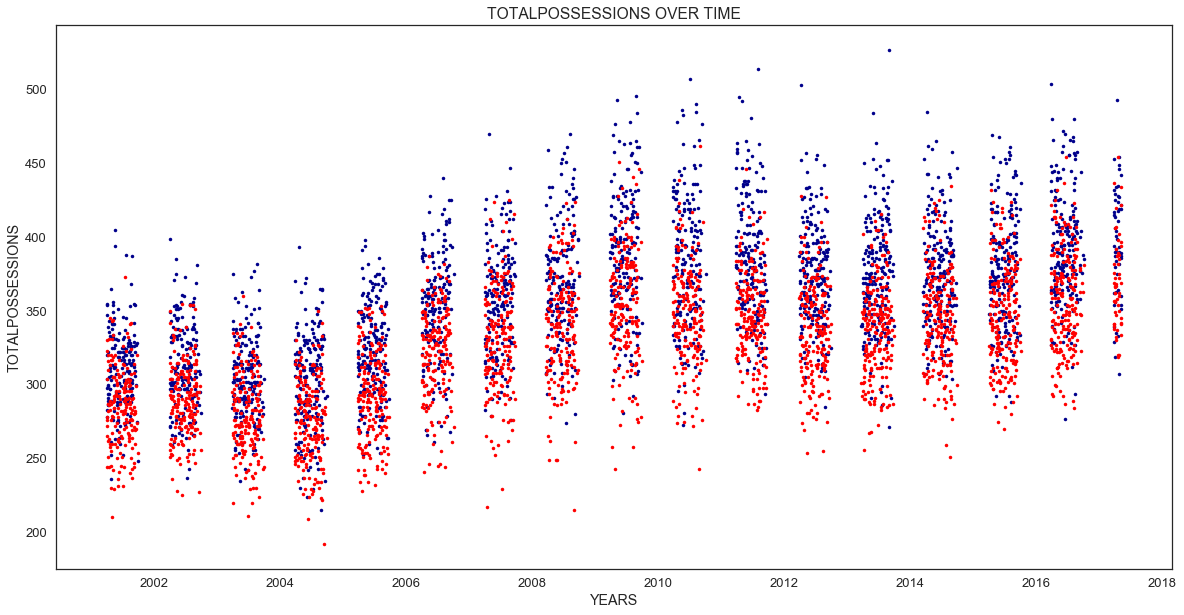

In [196]:
y1 = df_win.TOTALPOSSESSIONS
y2= df_lose.TOTALPOSSESSIONS
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("TOTALPOSSESSIONS OVER TIME")
plt.ylabel("TOTALPOSSESSIONS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

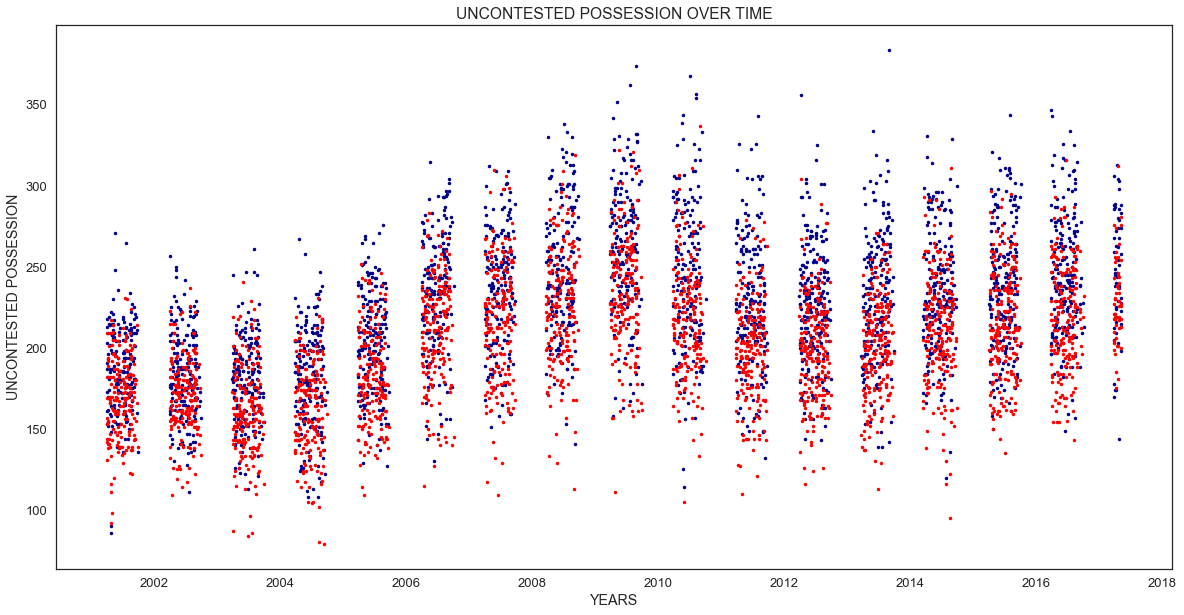

In [174]:
y1 = df_win.UNCONTESTEDPOSSESSIONS
y2= df_lose.UNCONTESTEDPOSSESSIONS
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("UNCONTESTED POSSESSION OVER TIME")
plt.ylabel("UNCONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

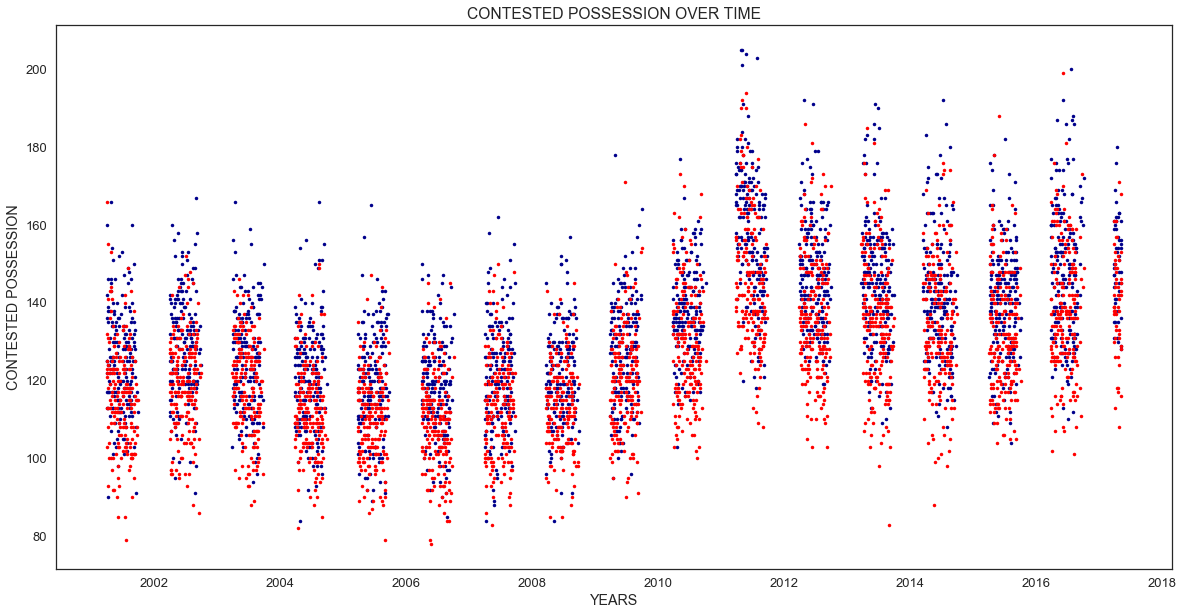

In [112]:
y1 = df_win.CONTESTEDPOSSESSIONS
y2= df_lose.CONTESTEDPOSSESSIONS
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

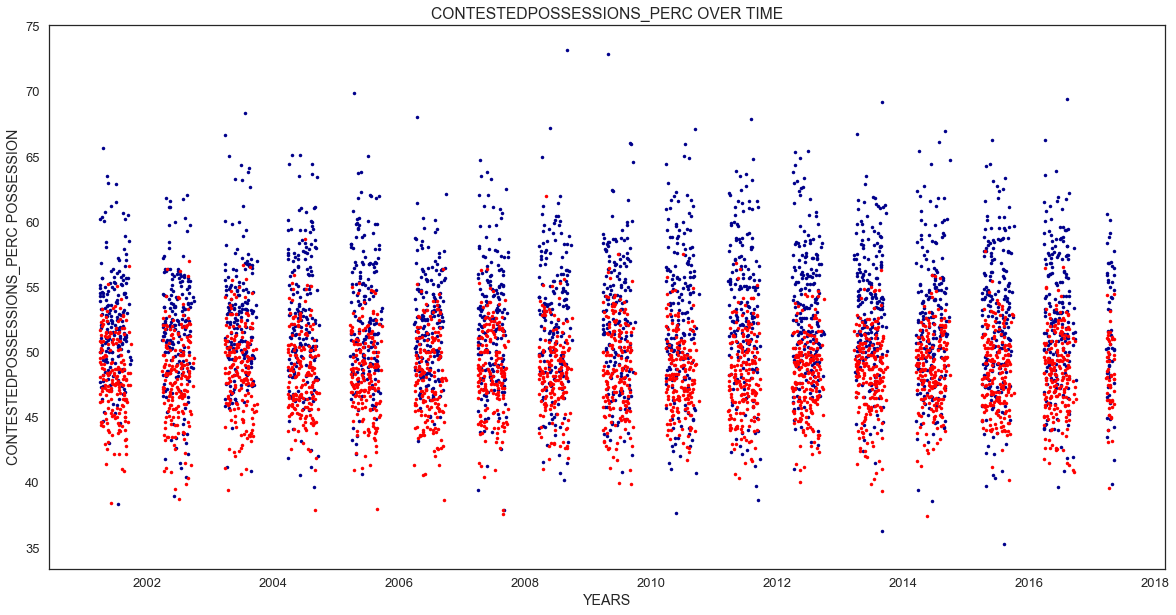

In [197]:
y1 = df_win.UNCONTESTEDPOSSESSIONS_PERC      
y2= df_lose.CONTESTEDPOSSESSIONS_PERC      
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("CONTESTEDPOSSESSIONS_PERC OVER TIME")
plt.ylabel("CONTESTEDPOSSESSIONS_PERC POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

## uncontested possessionb as % of total possession

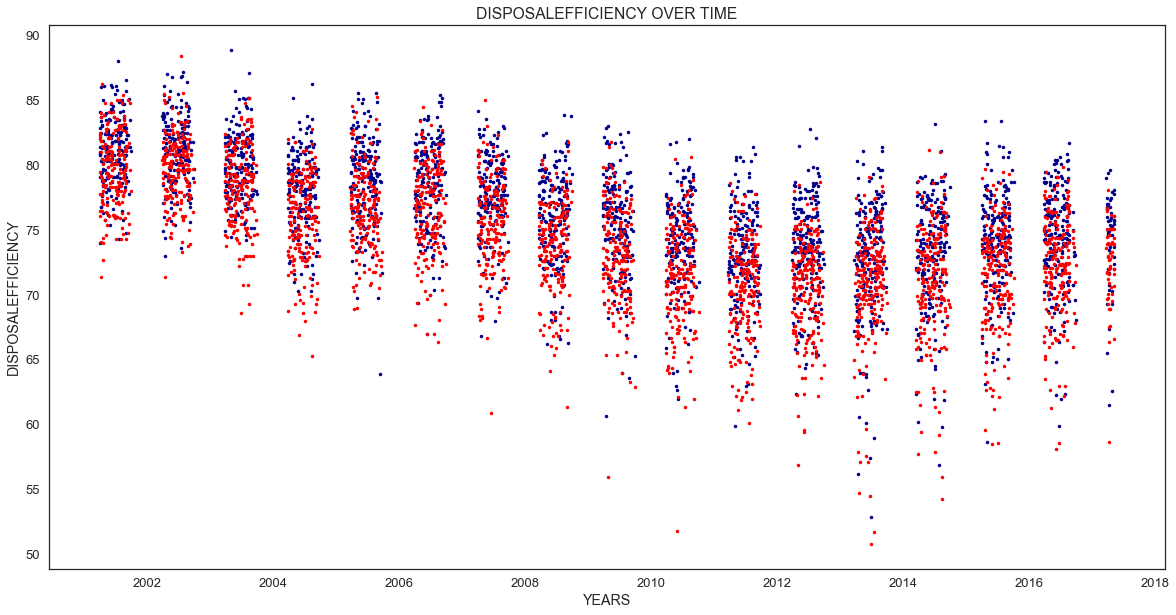

In [198]:
y1 = df_win.DISPOSALEFFICIENCY  
y2= df_lose.DISPOSALEFFICIENCY     
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("DISPOSALEFFICIENCY OVER TIME")
plt.ylabel("DISPOSALEFFICIENCY")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()


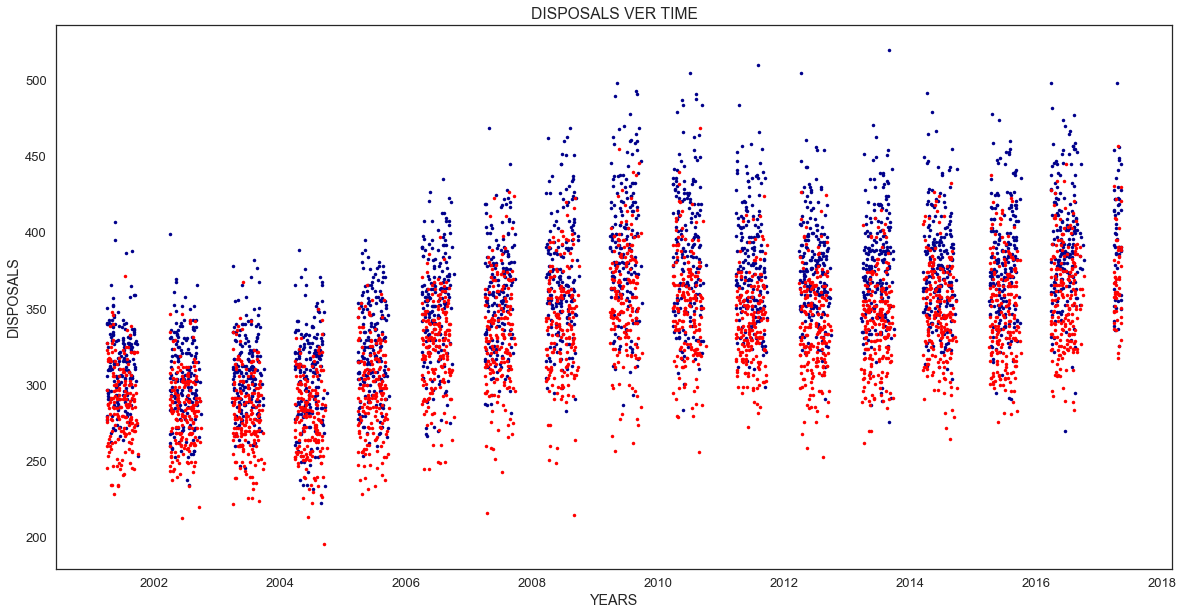

In [199]:
y1 = df_win.DISPOSALS                                     
y2= df_lose.DISPOSALS                                     
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("DISPOSALS VER TIME")
plt.ylabel("DISPOSALS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

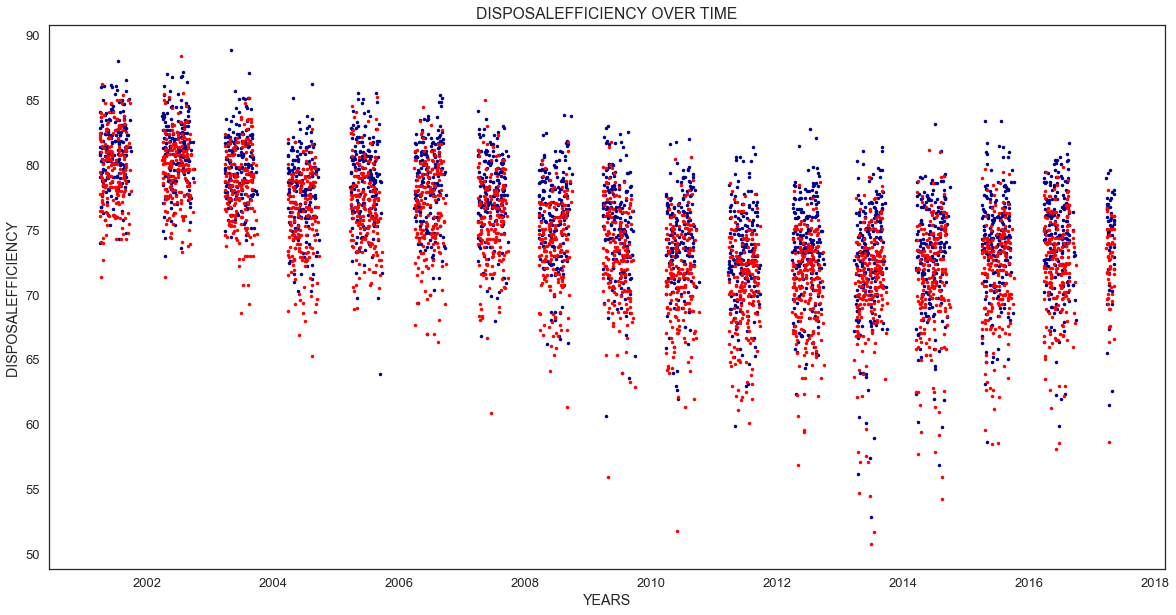

In [208]:
y1 = df_win.DISPOSALEFFICIENCY             
y2= df_lose.DISPOSALEFFICIENCY             
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("DISPOSALEFFICIENCY OVER TIME")
plt.ylabel("DISPOSALEFFICIENCY ")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

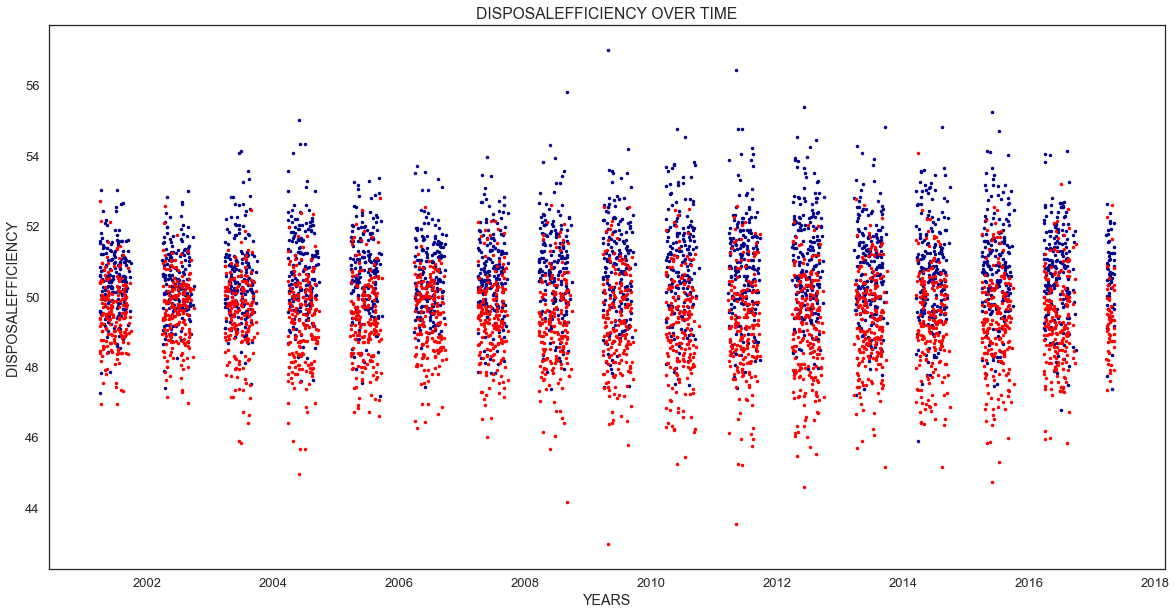

In [214]:
y1 = df_win.DISPOSALEFFICIENCY_PERC        
y2= df_lose.DISPOSALEFFICIENCY_PERC            
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("DISPOSALEFFICIENCY OVER TIME")
plt.ylabel("DISPOSALEFFICIENCY ")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

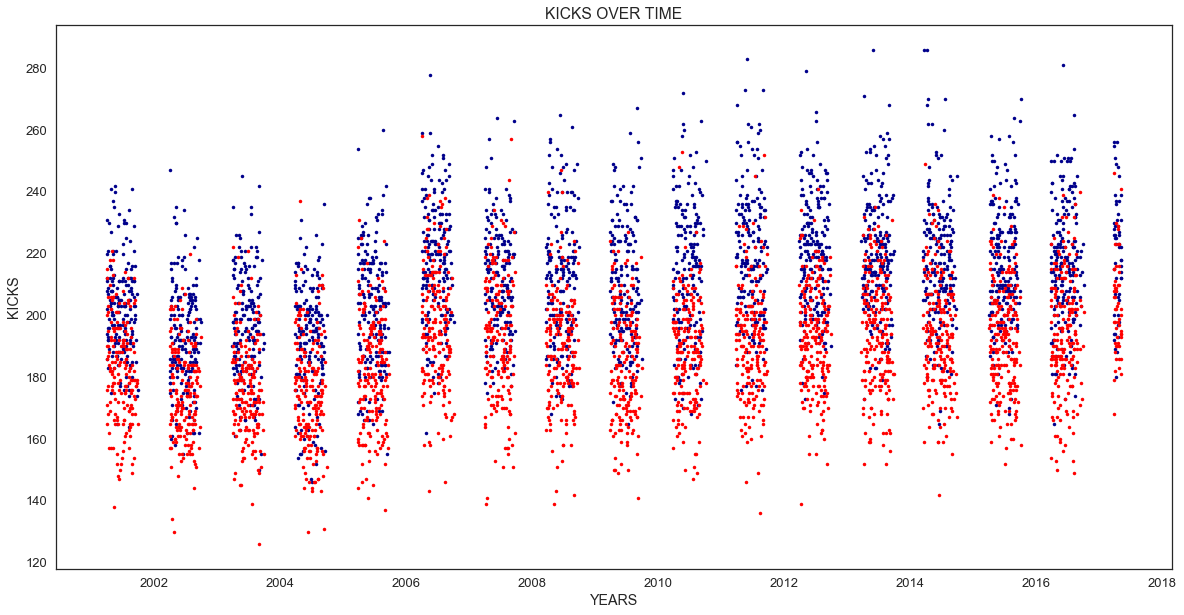

In [200]:
y1 = df_win.KICKS                                   
y2= df_lose.KICKS                                       
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("KICKS OVER TIME")
plt.ylabel("KICKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

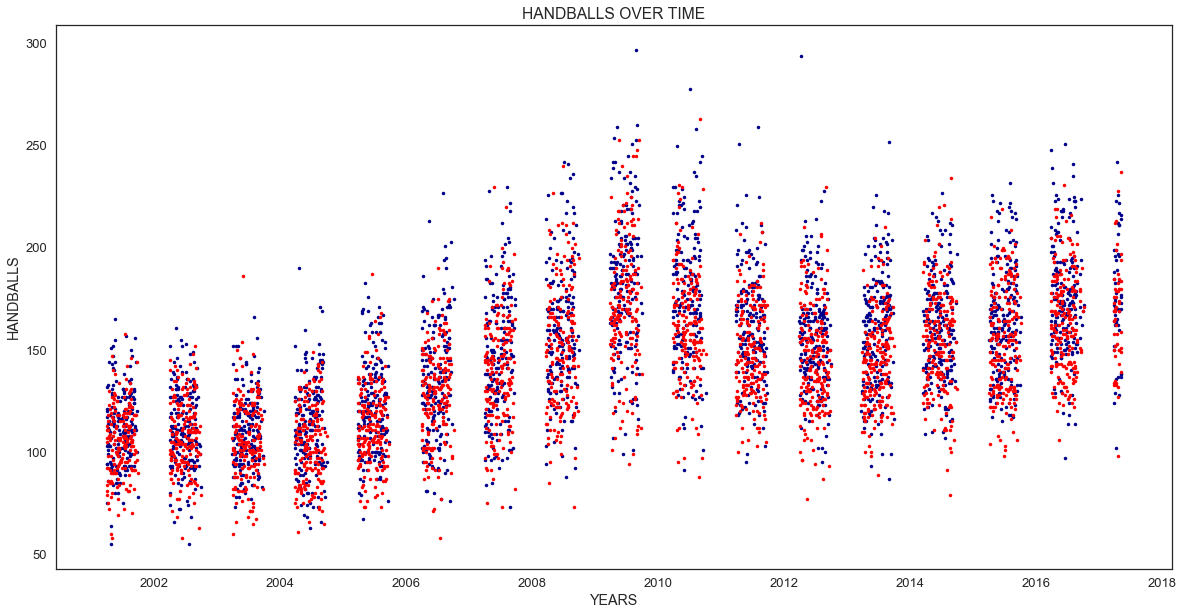

In [158]:
y1 = df_win.HANDBALLS
y2= df_lose.HANDBALLS
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("HANDBALLS OVER TIME")
plt.ylabel("HANDBALLS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

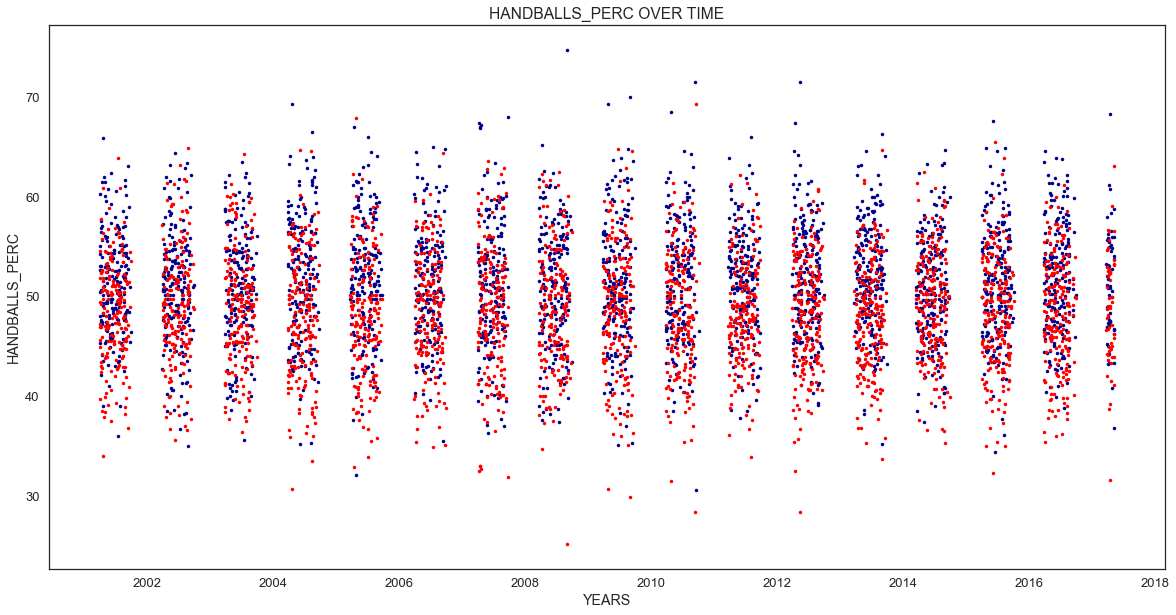

In [202]:
y1 = df_win.HANDBALLS_PERC
y2= df_lose.HANDBALLS_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("HANDBALLS_PERC OVER TIME")
plt.ylabel("HANDBALLS_PERC")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

###do  KICKS PERC

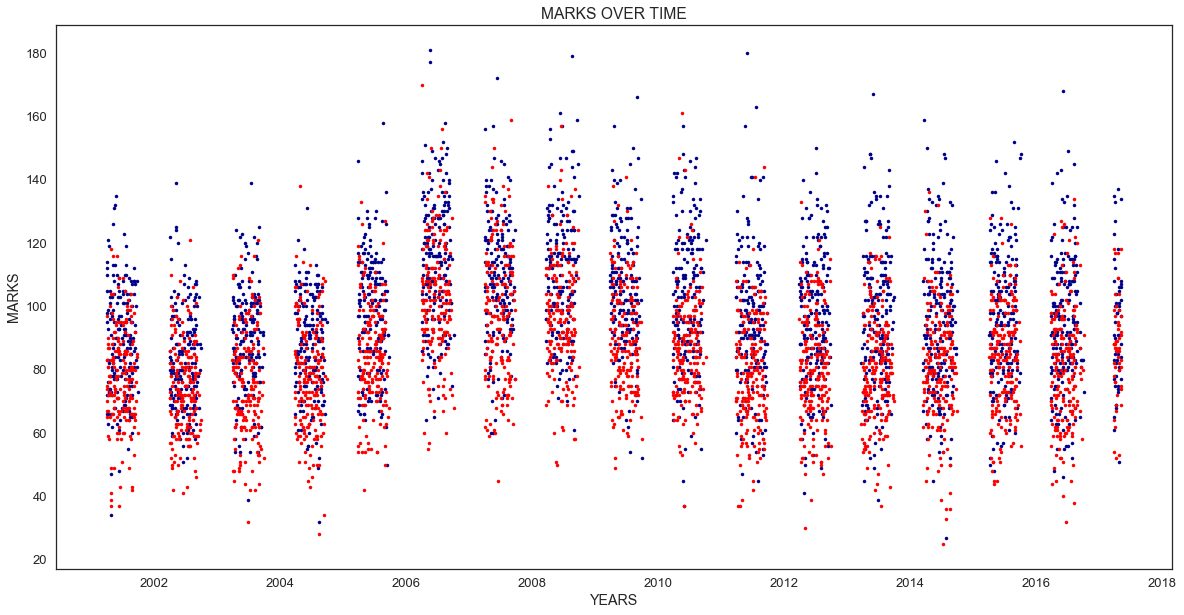

In [203]:
y1 = df_win.MARKS
y2= df_lose.MARKS
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

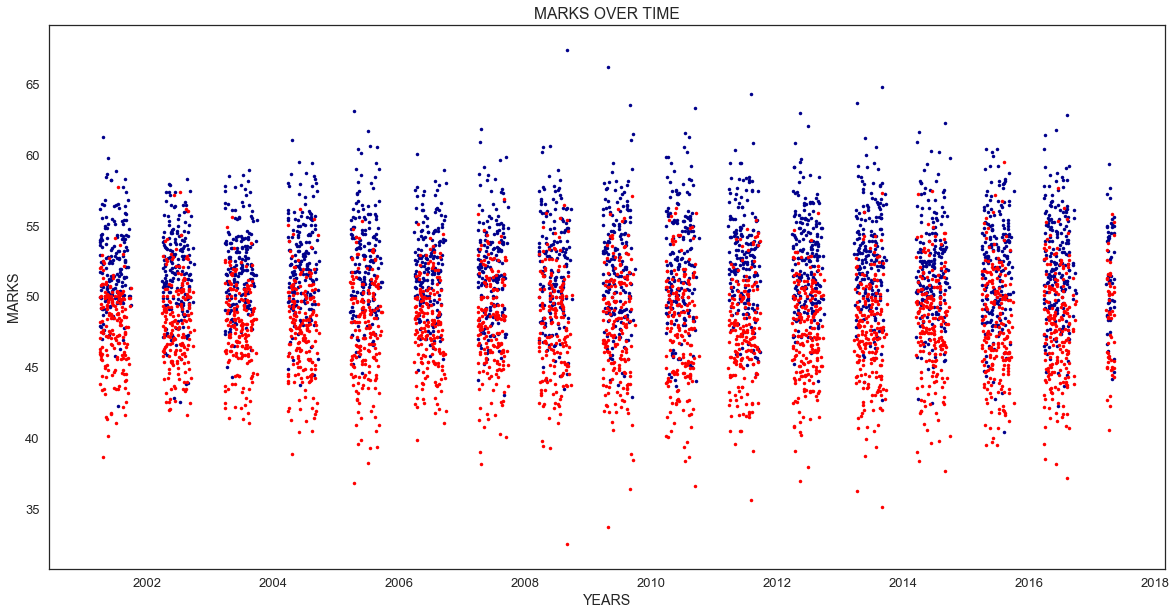

In [209]:
y1 = df_win.TOTALPOSSESSIONS_PERC
y2= df_lose.TOTALPOSSESSIONS_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

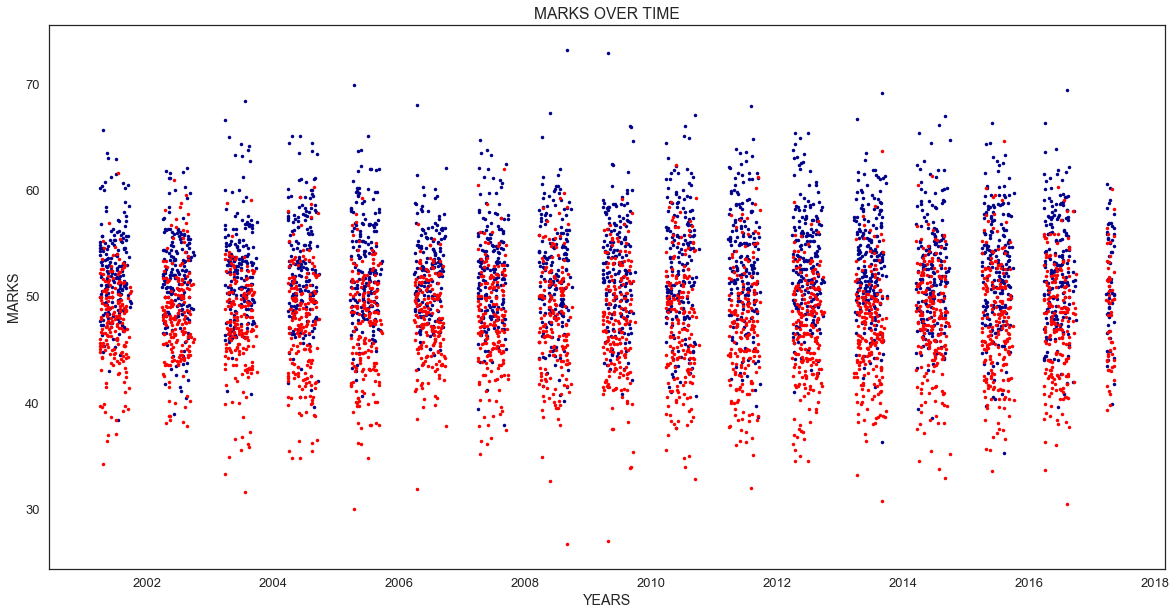

In [210]:
y1 = df_win.UNCONTESTEDPOSSESSIONS_PERC
y2= df_lose.UNCONTESTEDPOSSESSIONS_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

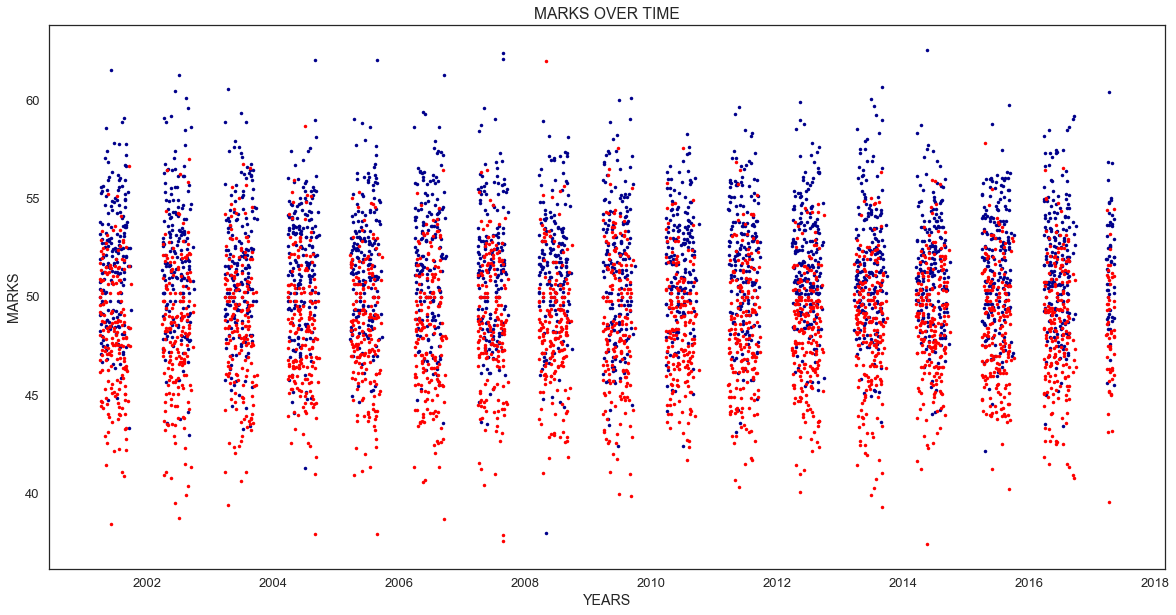

In [211]:
y1 = df_win.CONTESTEDPOSSESSIONS_PERC
y2= df_lose.CONTESTEDPOSSESSIONS_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

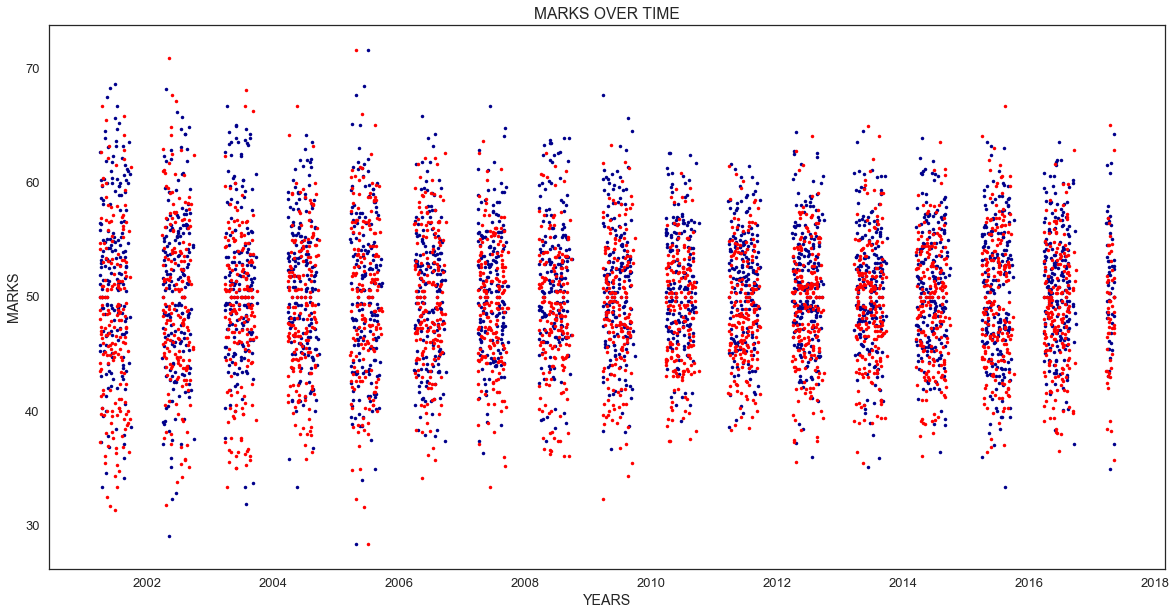

In [212]:
y1 = df_win.TACKLES_PERC
y2= df_lose.TACKLES_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

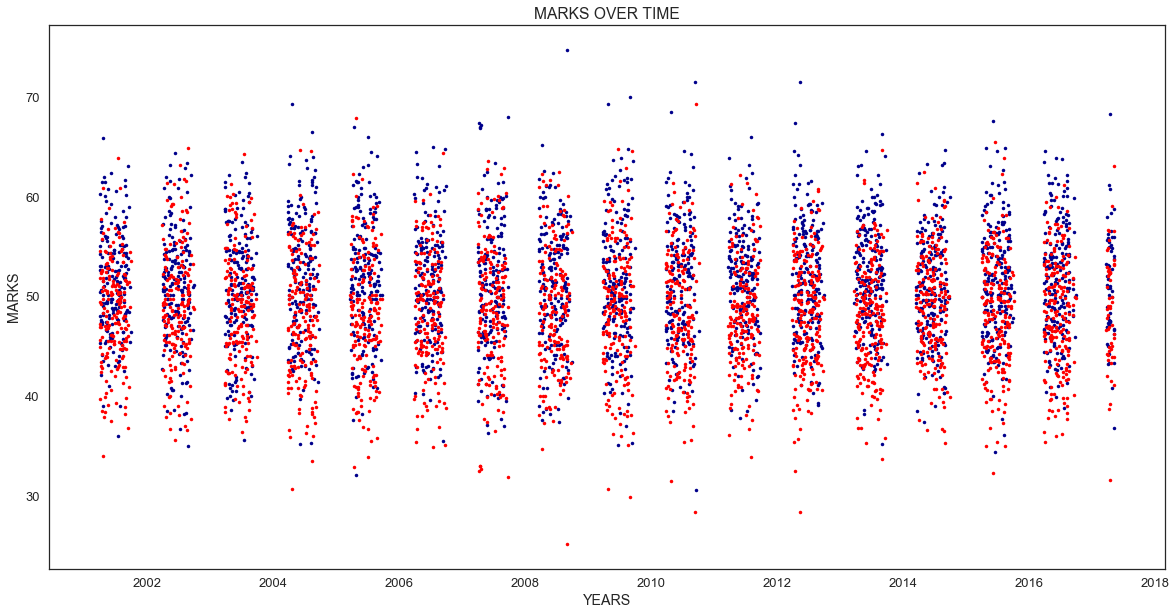

In [213]:
y1 = df_win.HANDBALLS_PERC
y2= df_lose.HANDBALLS_PERC
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKS OVER TIME")
plt.ylabel("MARKS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

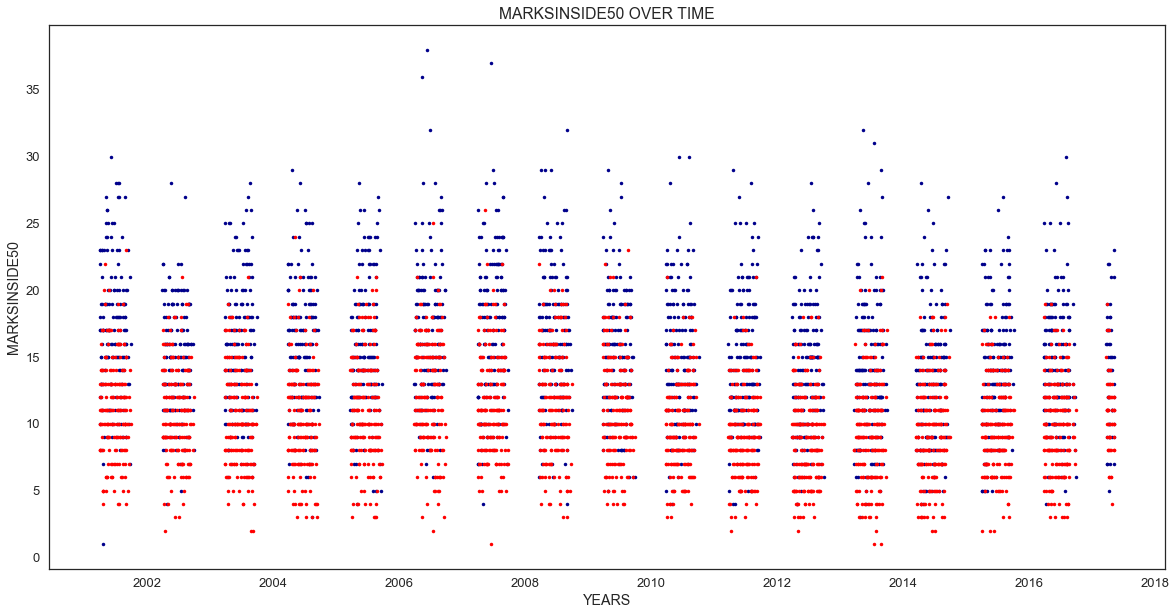

In [204]:
y1 = df_win.MARKSINSIDE50
y2= df_lose.MARKSINSIDE50
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("MARKSINSIDE50 OVER TIME")
plt.ylabel("MARKSINSIDE50")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

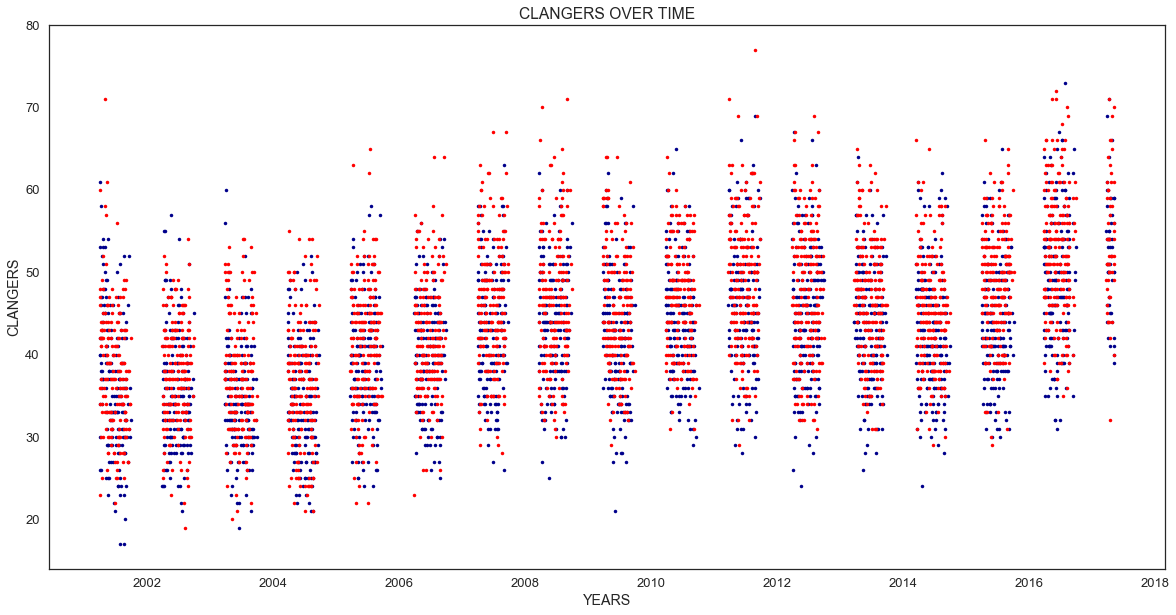

In [205]:
y1 = df_win.CLANGERS                                          
y2= df_lose.CLANGERS                         
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("CLANGERS OVER TIME")
plt.ylabel("CLANGERS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

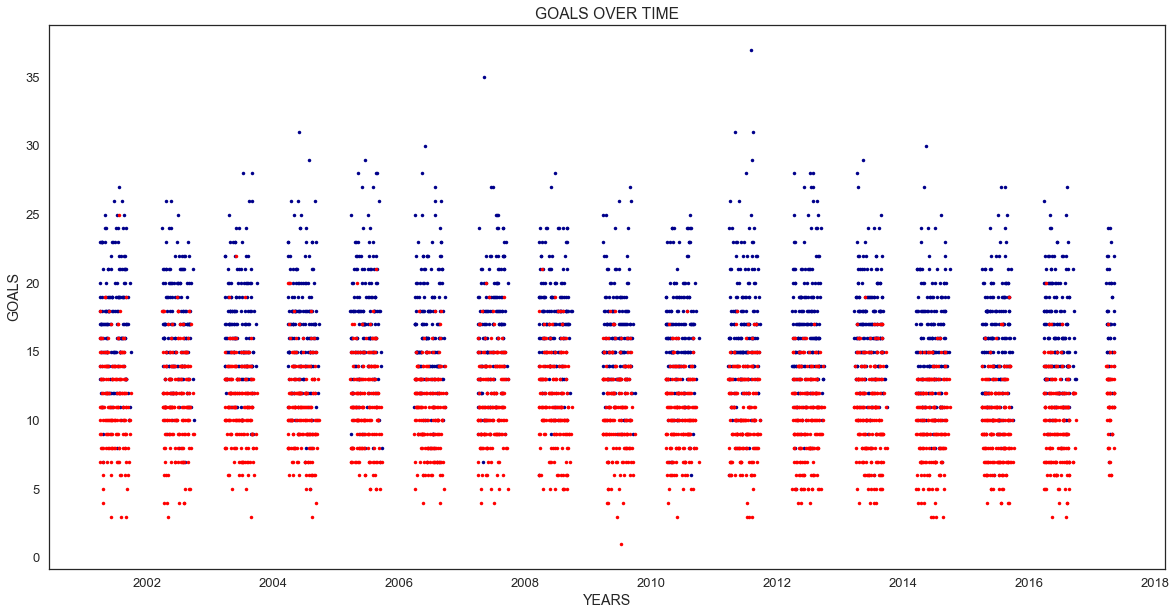

In [206]:
y1 = df_win.GOALS                                          
y2= df_lose.GOALS                         
time_range = df_win.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range, y2, markersize= 3.5, markerfacecolor = 'Red')

plt.title("GOALS OVER TIME")
plt.ylabel("GOALS")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

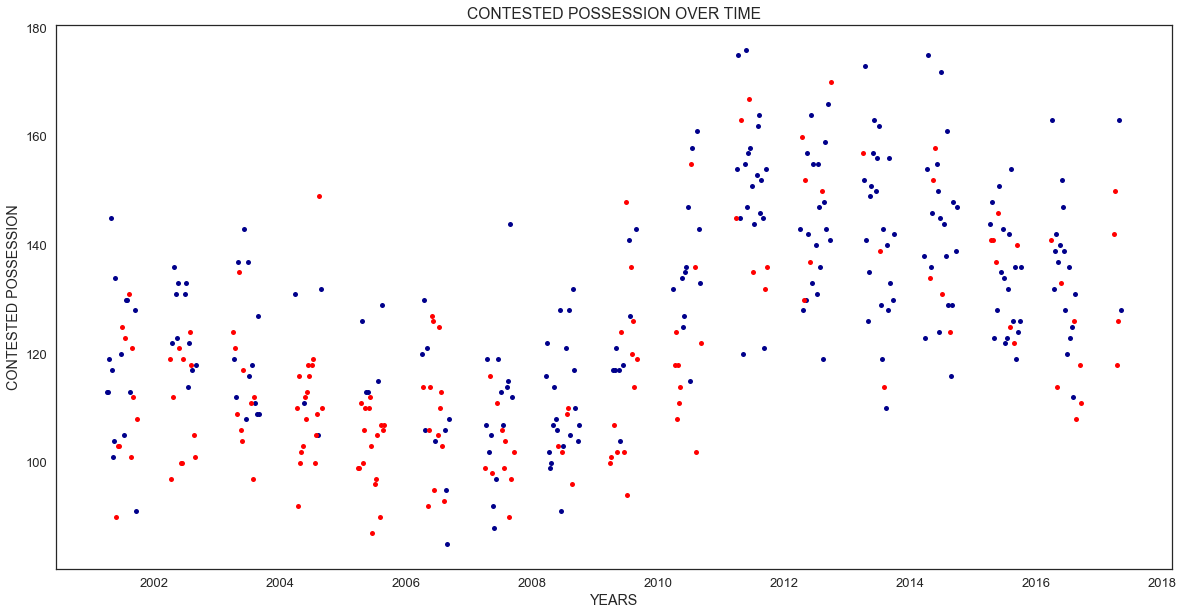

In [134]:
y1 = df_win[df_win.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
y2= df_lose[df_lose.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
time_range_01 = df_win[df_win.TEAMNAME == "Hawthorn"].PLOT_TIME
time_range_02 = df_lose[df_lose.TEAMNAME == "Hawthorn"].PLOT_TIME

plt.plot_date(time_range_01, y1, markersize= 5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range_02, y2, markersize= 5, markerfacecolor = 'Red')

plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

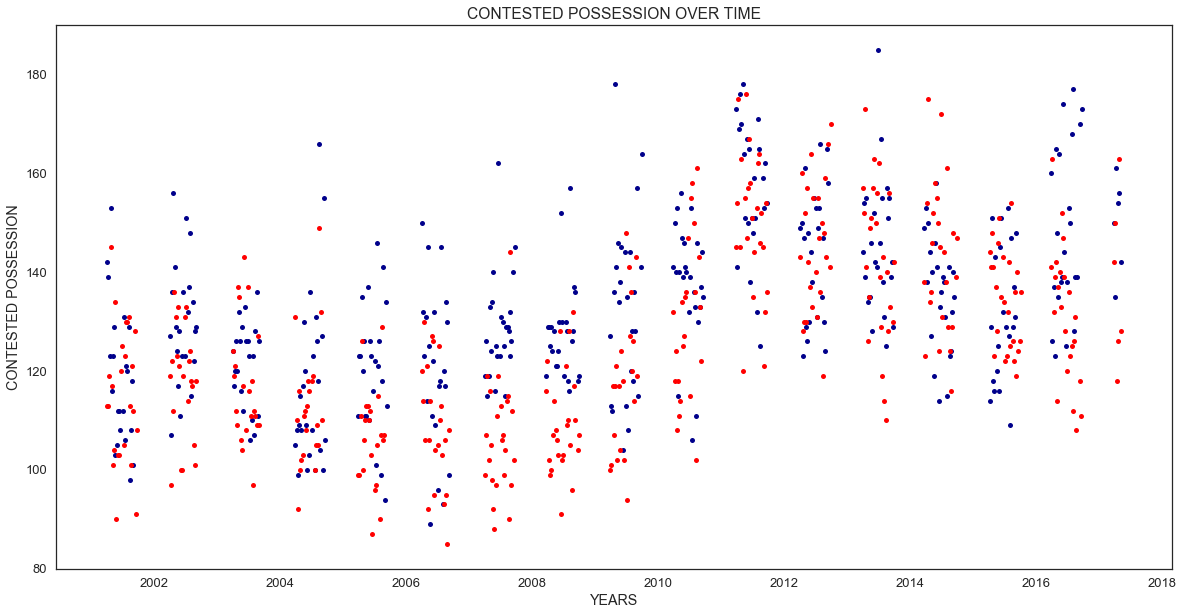

In [146]:
y1= df[df.TEAMNAME == "Geelong Cats"].CONTESTEDPOSSESSIONS
time_range_01 = df[df.TEAMNAME == "Geelong Cats"].PLOT_TIME
y2= df[df.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
time_range_02 = df[df.TEAMNAME == "Hawthorn"].PLOT_TIME

plt.plot_date(time_range_01, y1, markersize= 5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range_02, y2, markersize= 5, markerfacecolor = 'Red')

plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

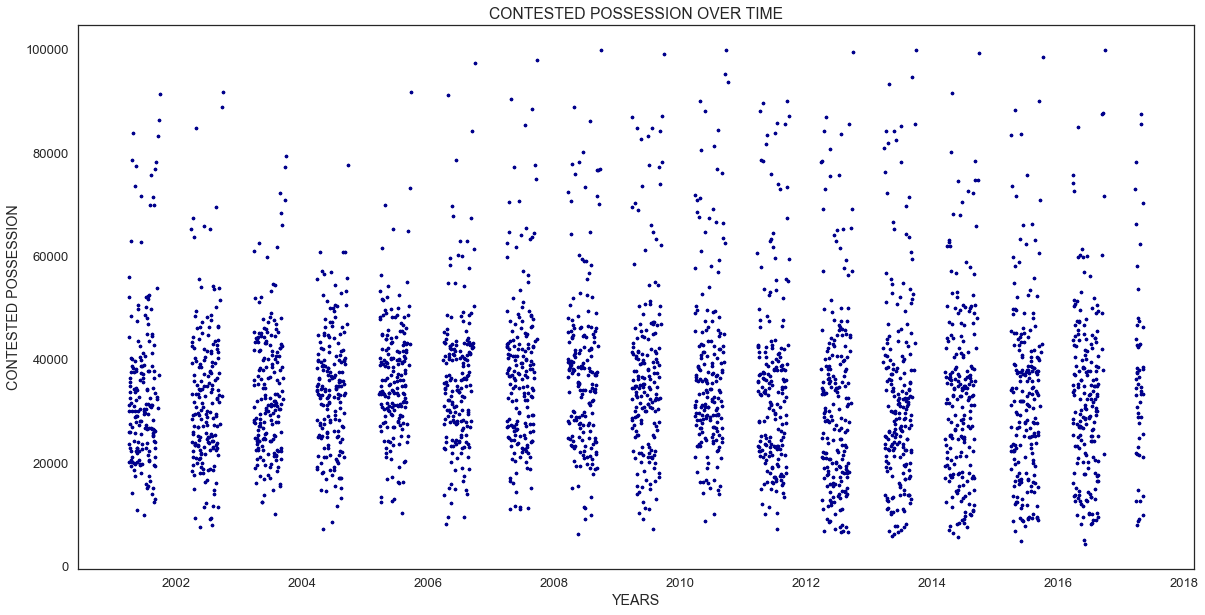

In [115]:
y1 = df.CROWD
time_range = df.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')


plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

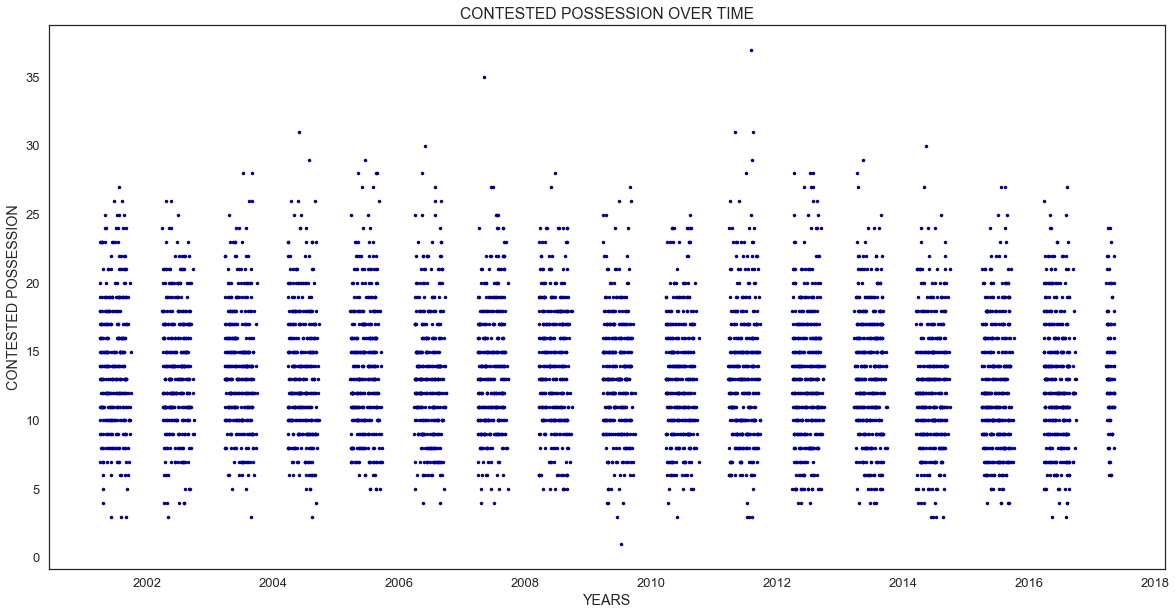

In [164]:
y1 = df.GOALS
time_range = df.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')


plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()